In [1]:
#importing the required libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load dataset
df=pd.read_csv('Bank Customer Churn Prediction.csv')

In [3]:
#print 1 st five rows to understand  what information in th data 
#useful for quickly inspecting the structure and content of the data.
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#get the information about no of rows and and columns
#10000--rows and 12--columns
df.shape

(10000, 12)

In [5]:
##its indicates shape of the dataframe and total memory usage and the data types of the columns. 
#It also indicates whether there are any missing values in the DataFrame.

df.info()


#[customer_id ,credit_score ,age,tenure,products_number,credit_card,active_member,churn] this are column have integer datatype
#[country, gender]-object datatyep means its contain string format
#[balance,estimated_salary]--deciaml no contain-datatype is float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
#find list of cutomer unique id that helps to get dataframe have any duplicate values
df.customer_id.nunique()

10000

In [7]:
df.duplicated().sum()

#customer id is unique so thats means in dataframe doesnot have duplicate value

0

In [8]:
# customer id is unique for every person so this not useful in our analysis
df.drop('customer_id',axis=1,inplace=True)

In [9]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# summary of statitics

df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# FOR CREDIT CARD_COLUMN

In [11]:
#credit_card
credit_card_counts=df['credit_card'].value_counts()
credit_card_counts
#7055-customers has credit card
#2945 -doesn't have credit card

1    7055
0    2945
Name: credit_card, dtype: int64

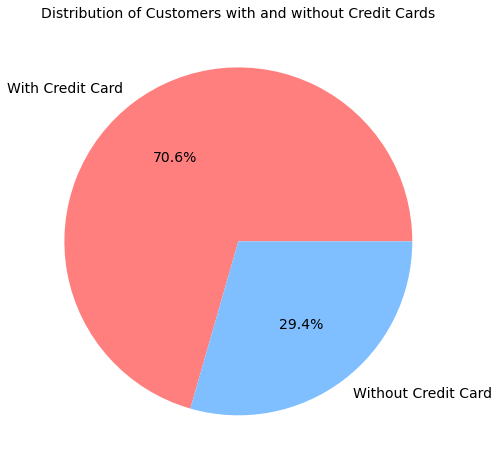

In [12]:
plt.figure(figsize=(10, 8))

# Define custom labels

labels = ['With Credit Card', 'Without Credit Card']
colors = ['#FF7F7F', '#7FBEFF']

# Plotting the pie chart with custom labels
plt.pie(credit_card_counts.values, labels=labels, autopct='%1.1f%%',colors=colors,textprops={'fontsize': 14})

# Customize the title
title_params = {
    'fontsize': 14,
    'fontweight': plt.rcParams['axes.titleweight']
}
plt.title('Distribution of Customers with and without Credit Cards', **title_params)

# Displaying the plot
plt.show()


In [13]:
#segement_analysis: "credit_card" column in conjunction with other customer attributes 
age_credit_card_segmentation=df.groupby('age')['credit_card'].mean()
gender_credit_card_segmentation=df.groupby('gender')['credit_card'].mean()
tenure_credit_card_segmentation=df.groupby('tenure')['credit_card'].mean()
products_number_credit_card_segmentation=df.groupby('products_number')['credit_card'].mean()

In [14]:
age_credit_card_segmentation #average credit card usage across different age segments.

age
18    0.636364
19    0.814815
20    0.650000
21    0.716981
22    0.690476
        ...   
83    0.000000
84    0.500000
85    1.000000
88    1.000000
92    0.500000
Name: credit_card, Length: 70, dtype: float64

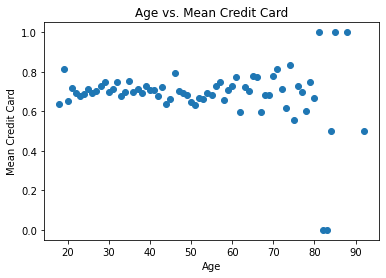

In [15]:


# Assuming age_credit_card_segmentation is a pandas Series object
age = age_credit_card_segmentation.index
credit_card_mean = age_credit_card_segmentation.values

# Create the scatter plot
plt.scatter(age, credit_card_mean)

# Add labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Mean Credit Card')
plt.title('Age vs. Mean Credit Card')

# Display the plot
plt.show()

In [16]:
gender_credit_card_segmentation ##average credit card usage across different gender segments.

gender
Female    0.702619
Male      0.707898
Name: credit_card, dtype: float64

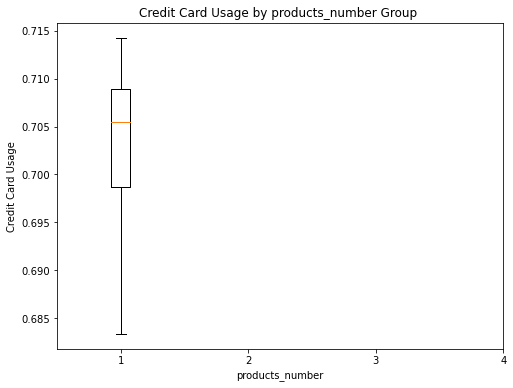

In [17]:
# Create the box plot
import matplotlib.pyplot as plt

# Group the data and calculate credit card usage for each segment
segment_data = df.groupby('products_number')['credit_card'].mean()

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(segment_data.values) 
plt.xticks(range(1, len(segment_data)+1), segment_data.index)  
plt.xlabel('products_number')
plt.ylabel('Credit Card Usage')
plt.title('Credit Card Usage by products_number Group ')
plt.show()

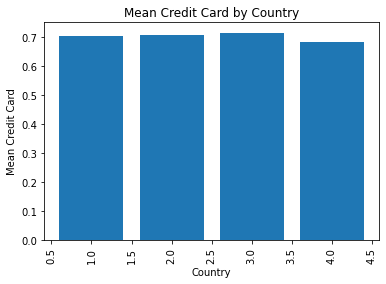

In [18]:
# Group the data and calculate credit card usage for each segment
country_segment_data = df.groupby('country')['credit_card'].mean()


# Assuming segment_data is a pandas Series object
countries = segment_data.index
credit_card_mean = segment_data.values

# Create the bar chart
plt.bar(countries, credit_card_mean)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title to the plot
plt.xlabel('Country')
plt.ylabel('Mean Credit Card')
plt.title('Mean Credit Card by Country')

# Display the plot
plt.show()

In [19]:
segment_data 

products_number
1    0.703777
2    0.707190
3    0.714286
4    0.683333
Name: credit_card, dtype: float64

In [20]:
###churn analysis


churn_analysis_data = df.groupby('churn')['credit_card'].mean()

In [21]:
churn_analysis_data

churn
0    0.707146
1    0.699067
Name: credit_card, dtype: float64

In [22]:
## cross analysis
# Group data by credit_card and calculate summary statistics
grouped_data = df.groupby('credit_card')['balance'].describe()

In [23]:
grouped_data

,count,mean,std,min,25%,50%,75%,max
credit_card,,,,,,,,
0,2945.0,77920.787552,61951.756426,0.0,0.0,97990.49,127269.750,250898.09
1,7055.0,75886.913330,62577.134010,0.0,0.0,96877.21,127761.655,221532.80


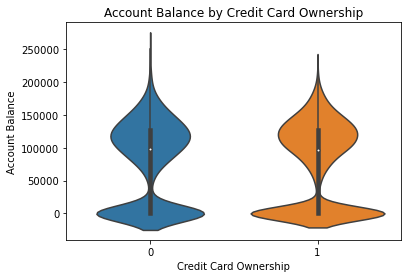

In [24]:
# Create the violin plot
sns.violinplot(data=df, x='credit_card', y='balance')

# Add labels and title to the plot
plt.xlabel('Credit Card Ownership')
plt.ylabel('Account Balance')
plt.title('Account Balance by Credit Card Ownership')

# Display the plot
plt.show()

In [25]:
##statistical analysis

import scipy.stats as stats



# Chi-square test
contingency_table = pd.crosstab(df['credit_card'], df['churn'])
chi2, p_val, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("p-value:", p_val)

Chi-square test results:
Chi-square statistic: 0.47133779904440803
p-value: 0.49237236141554686


In [26]:
# Independent t-test
credit_card_0 = df[df['credit_card'] == 0]['balance']
credit_card_1 = df[df['credit_card'] == 1]['balance']
t_stat, p_val = stats.ttest_ind(credit_card_0, credit_card_1, equal_var=False)
print("\nIndependent t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_val)


Independent t-test results:
t-statistic: 1.4919967485693244
p-value: 0.1357566864563077


# FOR COUNTRY COLUMN

In [27]:
# find customer churn rate on the basis of coutry
country_churn_rate=df.groupby('country')['churn'].mean()
print(country_churn_rate)

country
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churn, dtype: float64


In [28]:
#chi-square test is commonly used to assess the independence or association between two categorical variables..
#statistical analysis


# Chi-square test
contingency_table = pd.crosstab(df['country'], df['churn'])
chi2, p_val, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("p-value:", p_val)


Chi-square test results:
Chi-square statistic: 301.25533682434536
p-value: 3.8303176053541544e-66


In [29]:
#To find the correlation between a categorical variable like "country" and other numerical columns,
from scipy.stats import f_oneway
from scipy.stats import f_oneway

numerical_columns = ['credit_score', 'age', 'balance', 'products_number', 'estimated_salary']
categorical_column = 'country'

for i in numerical_columns:
    grouped_data = df.groupby(categorical_column)[i] 
    # here we grouped data with each numerical coland country col
    anova_result = f_oneway(*[grouped_data.get_group(country) for country in df[categorical_column].unique()])
    #* before the list is used to unpack the list, so each group is passed as a separate argument to the f_oneway. 
    print("ANOVA results for", i)
    print("F-statistic:", anova_result.statistic)
    print("p-value:", anova_result.pvalue)
    print()

ANOVA results for credit_score
F-statistic: 0.3994198989465179
p-value: 0.6707197151786737

ANOVA results for age
F-statistic: 12.106270732485994
p-value: 5.60622043878216e-06

ANOVA results for balance
F-statistic: 958.4254463368385
p-value: 0.0

ANOVA results for products_number
F-statistic: 0.7175834902822299
p-value: 0.487955050430974

ANOVA results for estimated_salary
F-statistic: 0.5827609114534064
p-value: 0.5583736355799094



In [30]:
#[country for country in df[categorical_column].unique()] --this used to get unique country
#[grouped_data.get_group(country) for country in df[categorical_column].unique()]

In [31]:
#customer segmentation based on country..

# Group data by country and calculate summary statistics
country_stats = df.groupby('country').agg({
    'credit_score': 'mean',
    'age': 'mean',
    'tenure': 'mean',
    'balance': 'mean',
    'products_number': 'mean',
    'credit_card': 'mean',
    'active_member': 'mean',
    'estimated_salary': 'mean',
    'churn': 'mean'
})

print(country_stats)

         credit_score        age    tenure        balance  products_number  \
country                                                                      
France     649.668329  38.511767  5.004587   62092.636516         1.530913   
Germany    651.453567  39.771622  5.009964  119730.116134         1.519729   
Spain      651.333872  38.890997  5.032297   61818.147763         1.539362   

         credit_card  active_member  estimated_salary     churn  
country                                                          
France      0.706621       0.516753      99899.180814  0.161548  
Germany     0.713830       0.497409     101113.435102  0.324432  
Spain       0.694792       0.529673      99440.572281  0.166734  


In [32]:
#frquency distribution
country_frequncy=df['country'].value_counts()

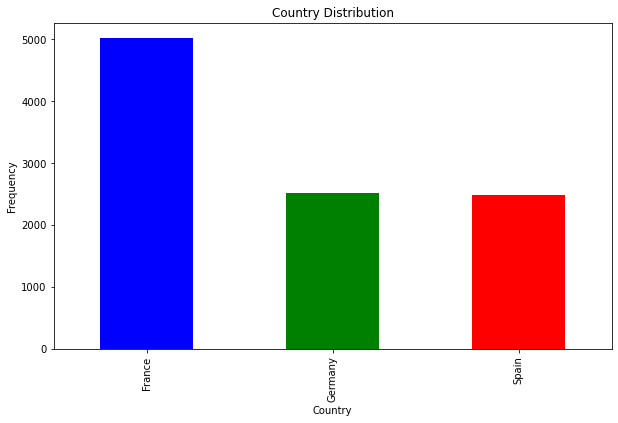

In [33]:
plt.figure(figsize=(10, 6))
country_frequncy.plot(kind='bar',color=['b', 'g','r'])
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()


# FOR GENDER COLUMN

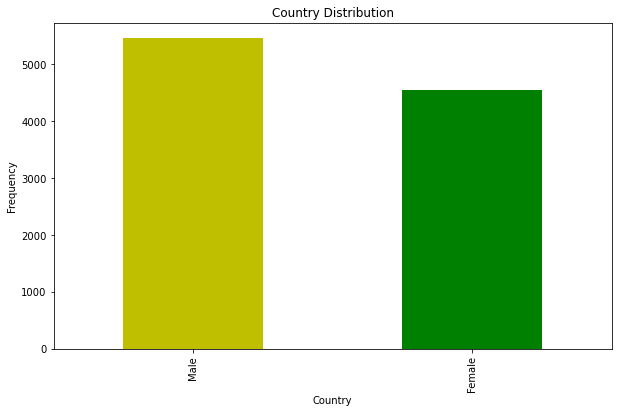

In [34]:
#frequency distribution
gender_frequncy=df['gender'].value_counts()
plt.figure(figsize=(10, 6))
gender_frequncy.plot(kind='bar',color=['y','g'])
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()
# males are more thal females in our dataset

In [35]:
#gender analysis --with each column

male_data=df[df['gender']== 'Male']
female_data=df[df['gender']== 'Female']

In [36]:
#for male
male_credit_score_mean=male_data['credit_score'].mean()
male_balance_mean=male_data['balance'].mean()
male_churn_mean=male_data['churn'].mean()
print('male_credit_score_mean',male_credit_score_mean)
print('male_balance_mean',male_balance_mean)
print('male_churn_mean',male_churn_mean)

male_credit_score_mean 650.2768920652373
male_balance_mean 77173.97450613906
male_churn_mean 0.16455928165658787


In [37]:
#for female
female_credit_score_mean=female_data['credit_score'].mean()
female_balance_mean=female_data['balance'].mean()
female_churn_mean=female_data['churn'].mean()
print('female_credit_score_mean',female_credit_score_mean)
print('female_balance_mean',female_balance_mean)
print('female_churn_mean',female_churn_mean)

female_credit_score_mean 650.831388950033
female_balance_mean 75659.36913933513
female_churn_mean 0.2507153863086066


C:\Users\Tejas\AppData\Local\Temp/ipykernel_25068/1886188817.py:10: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values, labels=labels, autopct='%1.1f%%',colors=colors)


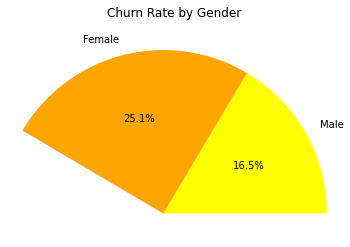

In [38]:
import matplotlib.pyplot as plt

churn_rate_male = 0.1646
churn_rate_female = 0.2507

labels = ['Male', 'Female']
values = [churn_rate_male, churn_rate_female]
colors = ['yellow', 'orange']

plt.pie(values, labels=labels, autopct='%1.1f%%',colors=colors)
plt.title('Churn Rate by Gender')
plt.axis('equal')
plt.show()

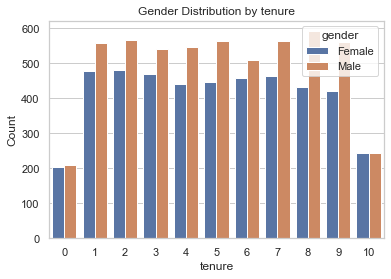

In [39]:
sns.set(style='whitegrid')
sns.countplot(x='tenure',hue='gender',data=df)
plt.xlabel('tenure')
plt.ylabel('Count')
plt.title('Gender Distribution by tenure')
plt.show()

In [40]:
# Calculate correlation coefficients
correlation_matrix = df.corr()
correlation_matrix

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


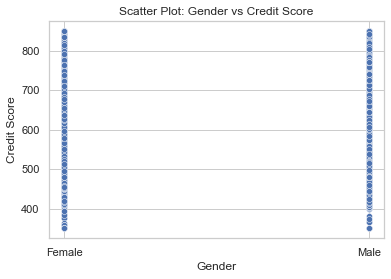

In [41]:
# Create scatter plots
sns.scatterplot(x='gender', y='credit_score', data=df)
plt.xlabel('Gender')
plt.ylabel('Credit Score')
plt.title('Scatter Plot: Gender vs Credit Score')
plt.show()


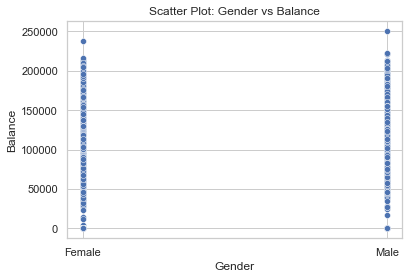

In [42]:
sns.scatterplot(x='gender', y='balance', data=df)
plt.xlabel('Gender',)
plt.ylabel('Balance')
plt.title('Scatter Plot: Gender vs Balance')
plt.show()

# Repeat the above steps for other variables of interest

In [43]:
# Assuming 'gender' is encoded as 0 for male and 1 for female
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Calculate correlation coefficients
correlation = df[['gender', 'credit_score', 'age', 'balance', 'products_number', 'estimated_salary']].corr()

print(correlation)

                    gender  credit_score       age   balance  products_number  \
gender            1.000000      0.002857  0.027544 -0.012087         0.021859   
credit_score      0.002857      1.000000 -0.003965  0.006268         0.012238   
age               0.027544     -0.003965  1.000000  0.028308        -0.030680   
balance          -0.012087      0.006268  0.028308  1.000000        -0.304180   
products_number   0.021859      0.012238 -0.030680 -0.304180         1.000000   
estimated_salary  0.008112     -0.001384 -0.007201  0.012797         0.014204   

                  estimated_salary  
gender                    0.008112  
credit_score             -0.001384  
age                      -0.007201  
balance                   0.012797  
products_number           0.014204  
estimated_salary          1.000000  


In [44]:
#for numerical variable to categorical : , you can use a t-test or ANOVA to compare means or variances between genders
#for categorical to categorical:  chi-square test of independence to examine the association between the variable and gender.

In [45]:
import scipy.stats as stats
#used to compare the means or medians of a numerical variable between two groups

# Example: Comparing credit scores between genders
male_scores = df[df['gender'] == 'Male']['credit_score']
female_scores = df[df['gender'] == 'Female']['credit_score']
numerical_columns = ['credit_score', 'age', 'balance', 'products_number', 'estimated_salary']

# Perform mann whitney-test
for column in numerical_columns:
    u_statistic, p_value = stats.mannwhitneyu(male_data[column], female_data[column])
    print(f"Mann-Whitney U test for {column}:")
    print(f"U-statistic: {u_statistic}")
    print(f"p-value: {p_value}\n")

Mann-Whitney U test for credit_score:
U-statistic: 12352291.5
p-value: 0.7633186115494625

Mann-Whitney U test for age:
U-statistic: 11967721.5
p-value: 0.002898242014868076

Mann-Whitney U test for balance:
U-statistic: 12585030.5
p-value: 0.17689812313038744

Mann-Whitney U test for products_number:
U-statistic: 12233300.5
p-value: 0.19879736680815863

Mann-Whitney U test for estimated_salary:
U-statistic: 12276729.0
p-value: 0.4083453950040178



# FOR TENURE COLUMN

In [46]:
#summary statistics
tenure_stat=df['tenure'].describe()
print('tenure_stattistics',tenure_stat)

tenure_stattistics count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64


In [47]:
tenure_counts=df['tenure'].value_counts()
tenure_counts

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

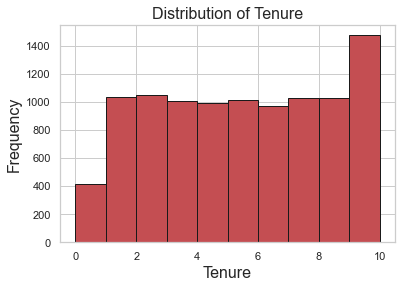

In [48]:
#frequency distribution
import matplotlib.pyplot as plt

# Plotting histogram
plt.hist(df['tenure'], bins=10, edgecolor='k',color='r')

# Adding labels and title
plt.xlabel('Tenure',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title('Distribution of Tenure',fontsize=16)

# Displaying the histogram
plt.show()


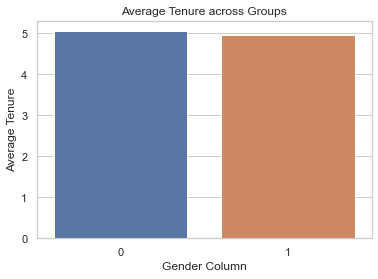

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
sns.barplot(x='gender', y='tenure', data=df, ci=None)

# Add labels and title
plt.xlabel('Gender Column')
plt.ylabel('Average Tenure')
plt.title('Average Tenure across Groups')

# Display the plot
plt.show()
#0--male 1-female

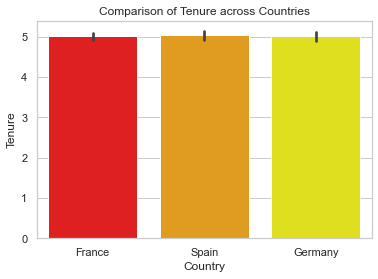

In [50]:
# Define custom colors for each country
colors = ['red', 'orange', 'yellow']

# Create the bar plot with custom colors
sns.barplot(x='country', y='tenure', data=df, palette=colors)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Tenure')
plt.title('Comparison of Tenure across Countries')

# Show the plot
plt.show()


In [51]:

# Calculate correlation coefficients
correlation_tenure = df[['tenure', 'credit_score', 'age', 'balance', 'products_number', 'estimated_salary']].corr()

print(correlation_tenure)

                    tenure  credit_score       age   balance  products_number  \
tenure            1.000000      0.000842 -0.009997 -0.012254         0.013444   
credit_score      0.000842      1.000000 -0.003965  0.006268         0.012238   
age              -0.009997     -0.003965  1.000000  0.028308        -0.030680   
balance          -0.012254      0.006268  0.028308  1.000000        -0.304180   
products_number   0.013444      0.012238 -0.030680 -0.304180         1.000000   
estimated_salary  0.007784     -0.001384 -0.007201  0.012797         0.014204   

                  estimated_salary  
tenure                    0.007784  
credit_score             -0.001384  
age                      -0.007201  
balance                   0.012797  
products_number           0.014204  
estimated_salary          1.000000  


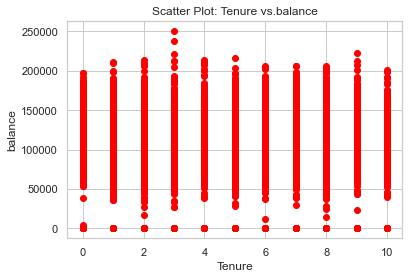

In [52]:
import matplotlib.pyplot as plt

plt.scatter(df['tenure'], df['balance'],color='red')
plt.xlabel('Tenure')
plt.ylabel('balance')
plt.title('Scatter Plot: Tenure vs.balance')

plt.show()
#negative realtion between balance and tenure

# FOR ACTIVE_MEMBER_COLUMN

In [53]:
churn_rate_active_member=df.groupby('active_member')['churn'].mean()
churn_rate_active_member

active_member
0    0.268509
1    0.142691
Name: churn, dtype: float64

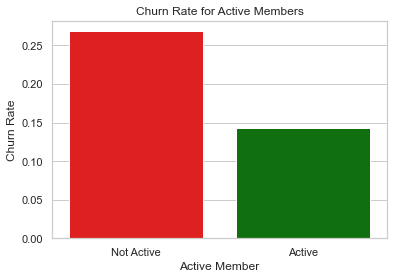

In [54]:
churn_rate=[0.268509,0.142691]
categories = ['Not Active', 'Active']
color=['red','green']

sns.barplot(x=categories, y=churn_rate,palette=color)

plt.xlabel('Active Member')
plt.ylabel('Churn Rate')
plt.title('Churn Rate for Active Members')

plt.show()

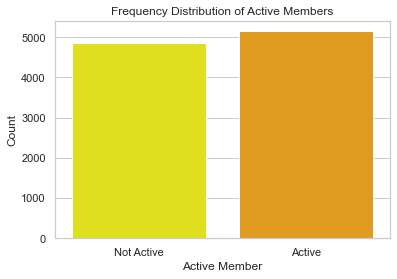

In [55]:
#frequency distribution
color=['yellow','orange']


# Assigning labels to x-axis tick labels
active_labels = ['Not Active', 'Active']

sns.countplot(x='active_member', data=df,palette=color)
plt.xticks(ticks=[0, 1], labels=active_labels)

plt.xlabel('Active Member')
plt.ylabel('Count')
plt.title('Frequency Distribution of Active Members')

plt.show()
#, we can see that the number of customers who are  active members (1) is higher compared to the number of customers who are not active members (0).

In [56]:
#percentage of active member
active_member_value=df['active_member'].value_counts(normalize=True) * 100
'active_member_value','--->',active_member_value

('active_member_value',
 '--->',
 1    51.51
 0    48.49
 Name: active_member, dtype: float64)

In [57]:
#cross tabulation also called contingencyy table -->useful in understanding the relationship between two categorical variables.


# Perform cross-tabulation between 'active_member' and 'country'
cross_tab_country = pd.crosstab(df['active_member'], df['country'])
                                                
# Perform cross-tabulation between 'active_member' and 'gender'
cross_tab_gender = pd.crosstab(df['active_member'], df['gender'])

# Print the cross-tabulation table
print('cross_tab_gender ',cross_tab_gender)
print('cross_tab_coutry ',cross_tab_country)

cross_tab_gender  gender            0     1
active_member            
0              2590  2259
1              2867  2284
cross_tab_coutry  country        France  Germany  Spain
active_member                        
0                2423     1261   1165
1                2591     1248   1312


In [58]:
# Perform cross-tabulation between 'active_member' and 'gender'
cross_tab_churn = pd.crosstab(df['active_member'], df['churn'])
print('cross_tab_churn ',cross_tab_churn)

cross_tab_churn  churn             0     1
active_member            
0              3547  1302
1              4416   735


In [59]:

from scipy.stats import chi2_contingency


# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(cross_tab_churn)

# Print the test results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)

Chi-square statistic: 242.98534164287963
P-value: 8.785858269303703e-55
Degrees of freedom: 1


# FOR CREDIT_SCORE_COLUMN

In [60]:
credit_score_stats=df['credit_score'].describe()
print('credit_score_stat',credit_score_stats)

credit_score_stat count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64


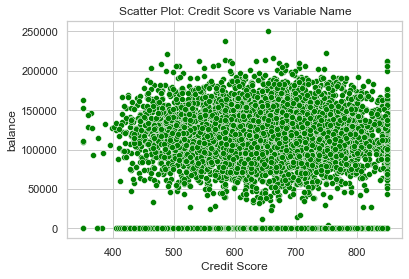

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='credit_score', y='balance', data=df,color='green')
plt.xlabel('Credit Score')
plt.ylabel('balance')
plt.title('Scatter Plot: Credit Score vs Variable Name')
plt.show()

In [62]:
correlation_balance=df['credit_score'].corr(df['balance'])
correlation_balance

0.006268381616008714

In [ ]:
## Categorical variable: Country,credit_card,activemember

In [65]:
average_credit_score_country = df.groupby('country')['credit_score'].mean()

average_credit_score_credit_card = df.groupby('credit_card')['credit_score'].mean()

average_credit_score_membership = df.groupby('active_member')['credit_score'].mean()

print('average_credit_score_country',average_credit_score_country)

print('\naverage_credit_score_credit_card',average_credit_score_credit_card)

print('\naverage_credit_score_membership',average_credit_score_membership)

average_credit_score_country country
France     649.668329
Germany    651.453567
Spain      651.333872
Name: credit_score, dtype: float64

average_credit_score_credit_card credit_card
0    651.345331
1    650.187952
Name: credit_score, dtype: float64

average_credit_score_membership active_member
0    647.973603
1    652.934188
Name: credit_score, dtype: float64


In [66]:
# Define age groups and corresponding labels
age_groups = [18, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Assign age groups to data
df['age_group'] = pd.cut(df['age'], bins=age_groups, labels=age_labels, right=False)

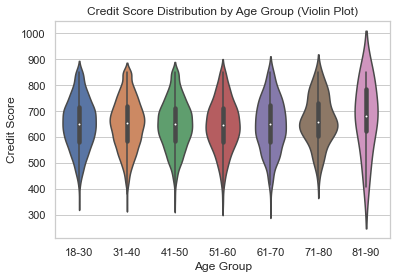

In [67]:
# Create violin plot for credit score distribution across age groups
sns.violinplot(x='age_group', y='credit_score', data=df)
plt.xlabel('Age Group')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Age Group (Violin Plot)')
plt.show()

In [68]:
# Group the data by age groups and calculate mean credit score
age_groups = df.groupby('age_group')['credit_score'].describe()

# Print the mean credit score for each age group
print(age_groups)


            count        mean         std    min     25%    50%     75%    max
age_group                                                                     
18-30      1641.0  651.140768   95.935606  363.0  583.00  652.0  717.00  850.0
31-40      4346.0  651.649563   97.423944  350.0  584.00  654.0  720.00  850.0
41-50      2618.0  649.065317   94.912477  350.0  584.00  649.0  714.00  850.0
51-60       869.0  646.355581   97.760694  350.0  582.00  647.0  712.00  850.0
61-70       375.0  647.986667  100.402518  350.0  580.00  650.0  722.00  850.0
71-80       136.0  665.492647   91.840925  434.0  605.75  656.5  732.25  850.0
81-90        13.0  677.000000  133.349166  408.0  624.00  682.0  787.00  850.0


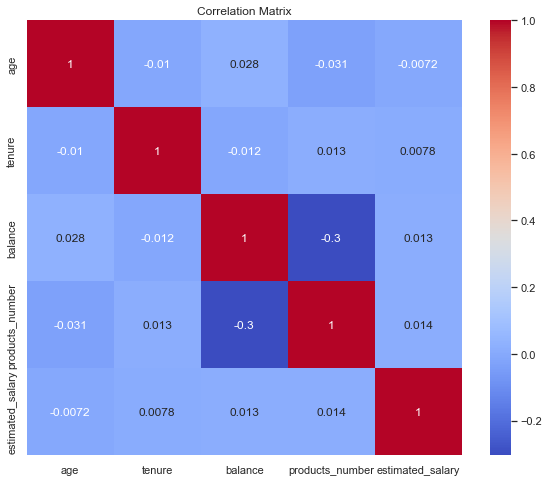

In [69]:
import pandas as pd

# Select the relevant numerical variables
numerical_variables = ['age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Calculate the correlation coefficients
correlation_matrix = df[numerical_variables].corr()

# Create a correlation matrix or heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


# FOR BALANCE COLUMN

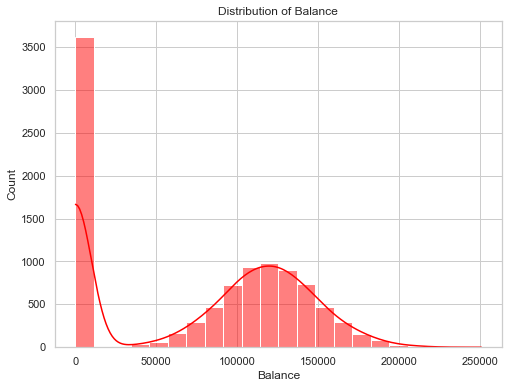

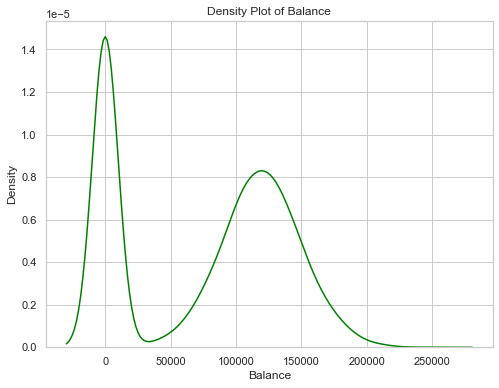

In [72]:
# Plot a histogram of the "balance" column
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='balance', kde=True,color='red')
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

# Plot a density plot of the "balance" column
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='balance',color='green')
plt.title('Density Plot of Balance')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()

In [74]:
# Calculate skewness and kurtosis
skewness = df['balance'].skew()
kurtosis = df['balance'].kurtosis()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: -0.14110871094154384
Kurtosis: -1.489411767941925


In [75]:
# Group the data by a categorical variable (e.g., country) and calculate the average balance
average_balance_by_country = df.groupby('country')['balance'].mean()

# Print the average balances by country
print(average_balance_by_country)


country
France      62092.636516
Germany    119730.116134
Spain       61818.147763
Name: balance, dtype: float64


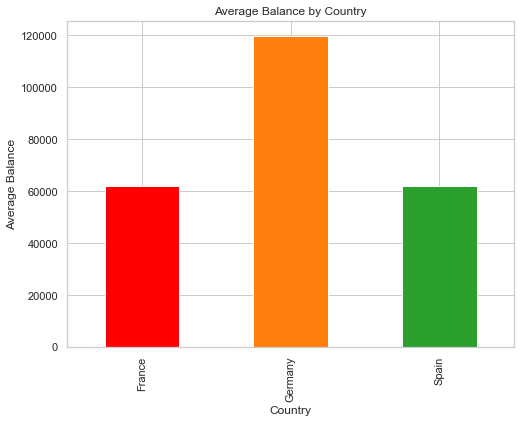

In [79]:
import matplotlib.pyplot as plt

# Define colors for each country
colors = ["red", "#ff7f0e", "#2ca02c"]

# Plot a bar chart of the average balances by country with custom colors
plt.figure(figsize=(8, 6))
average_balance_by_country.plot(kind='bar', color=colors)
plt.title('Average Balance by Country')
plt.xlabel('Country')
plt.ylabel('Average Balance')
plt.show()


In [80]:
average_balance_by_gender = df.groupby('gender')['balance'].mean()
average_balance_by_active_member= df.groupby('active_member')['balance'].mean()

In [82]:
print('average_balance_by_active_member',average_balance_by_active_member)
print('\naverage_balance_by_gender ',average_balance_by_gender )

average_balance_by_active_member active_member
0    77134.376863
1    75875.422145
Name: balance, dtype: float64

average_balance_by_gender  gender
0    77173.974506
1    75659.369139
Name: balance, dtype: float64


In [83]:
#outlier analysis--techniqe--iqr,z-score-method,boxplot
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['balance'] < lower_bound) | (df['balance'] > upper_bound)]


In [84]:
outliers

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_group


In [85]:
#  no outlier detection

# FOR ESTIMATED_SALARY_COLUMN


In [86]:
average_salary_by_country = df.groupby('country')['estimated_salary'].mean()
average_salary_by_gender = df.groupby('gender')['estimated_salary'].mean()
average_salary_by_active_member = df.groupby('active_member')['estimated_salary'].mean()

In [89]:
print('average_salary_by_country',average_salary_by_country)
print('\naverage_salary_by_gender',average_salary_by_gender)
print('\naverage_salary_by_active_member',average_salary_by_active_member)

average_salary_by_country country
France      99899.180814
Germany    101113.435102
Spain       99440.572281
Name: estimated_salary, dtype: float64

average_salary_by_gender gender
0     99664.576931
1    100601.541382
Name: estimated_salary, dtype: float64

average_salary_by_active_member active_member
0    100767.203854
1     99452.965894
Name: estimated_salary, dtype: float64


In [91]:
# Calculate skewness and kurtosis
skewness = df['estimated_salary'].skew()
kurtosis = df['estimated_salary'].kurtosis()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 0.0020853576615585162
Kurtosis: -1.1815184473915485


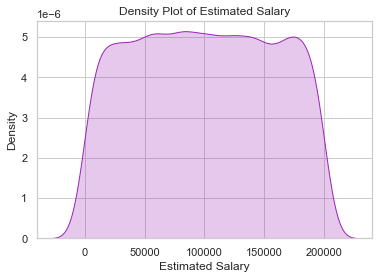

In [97]:
sns.set_style("whitegrid")
sns.kdeplot(df['estimated_salary'], shade=True,color='#9B26B6')
plt.title('Density Plot of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.show()


# FOR PRODUCTS_NO_COL

In [99]:
# Calculate skewness and kurtosis
skewness = df['products_number'].skew()
kurtosis = df['products_number'].kurtosis()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 0.7455678882823168
Kurtosis: 0.5829807629457178


# FOR CHURN COLUMN 

In [100]:
churn_count=df['churn'].value_counts()

In [101]:
churn_count

0    7963
1    2037
Name: churn, dtype: int64

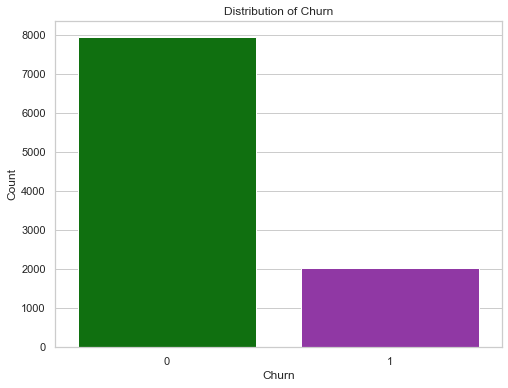

In [106]:

# Define a color palette for the plot
palette = ["green", "#9B26B6"]

# Plotting the count of churned and non-churned customers
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='churn', palette=palette)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [107]:
churn_percentage = churn_count / len(df) * 100
churn_percentage 

0    79.63
1    20.37
Name: churn, dtype: float64

In [108]:
# Calculate the average balance for churned and non-churned customers
mean_balance_churned = df[df['churn'] == 1]['balance'].mean()
mean_balance_nonchurned = df[df['churn'] == 0]['balance'].mean()

# Print the average balances
print("Average Balance for Churned Customers:", mean_balance_churned)
print("Average Balance for Non-Churned Customers:", mean_balance_nonchurned)

Average Balance for Churned Customers: 91108.53933726063
Average Balance for Non-Churned Customers: 72745.29677885193


In [110]:
from scipy.stats import ttest_ind
# Perform a t-test for balance between churned and non-churned customers
balance_churned = df[df['churn'] == 1]['balance']
balance_nonchurned = df[df['churn'] == 0]['balance']
t_statistic, p_value = ttest_ind(balance_churned, balance_nonchurned)

# Print the t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 11.936240300013841
P-Value: 1.2755633191525477e-32


In [111]:
# Calculate the average balance for churned and non-churned customers
mean_balance_churned = df[df['churn'] == 1]['credit_score'].mean()
mean_balance_nonchurned = df[df['churn'] == 0]['credit_score'].mean()

# Print the average balances
print("Average credit_score for Churned Customers:", mean_balance_churned)
print("Average credit_score for Non-Churned Customers:", mean_balance_nonchurned)

Average credit_score for Churned Customers: 645.3514972999509
Average credit_score for Non-Churned Customers: 651.8531960316463


# final if you want to get primary report for reading purpose used pandas profiling..


import pandas_profiling as pp

profile = pp.ProfileReport(df)

profile.to_file("output_bank.html")
